## Author: Akash Gupta

### Task 3

### Grip Feb'21

## Exploratory Data Analysis - Retail

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
data = pd.read_csv('SampleSuperstore.csv')
data.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


In [8]:
data['Postal Code'] = data['Postal Code'].astype('object',copy=False)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null object
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


In [10]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [11]:
data.iloc[:,:-4].nunique()  # unique values of all columns(with type object)

Ship Mode         4
Segment           3
Country           1
City            531
State            49
Postal Code     631
Region            4
Category          3
Sub-Category     17
dtype: int64

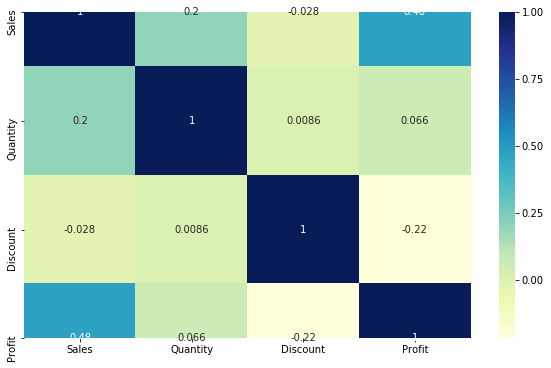

In [12]:
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='YlGnBu')

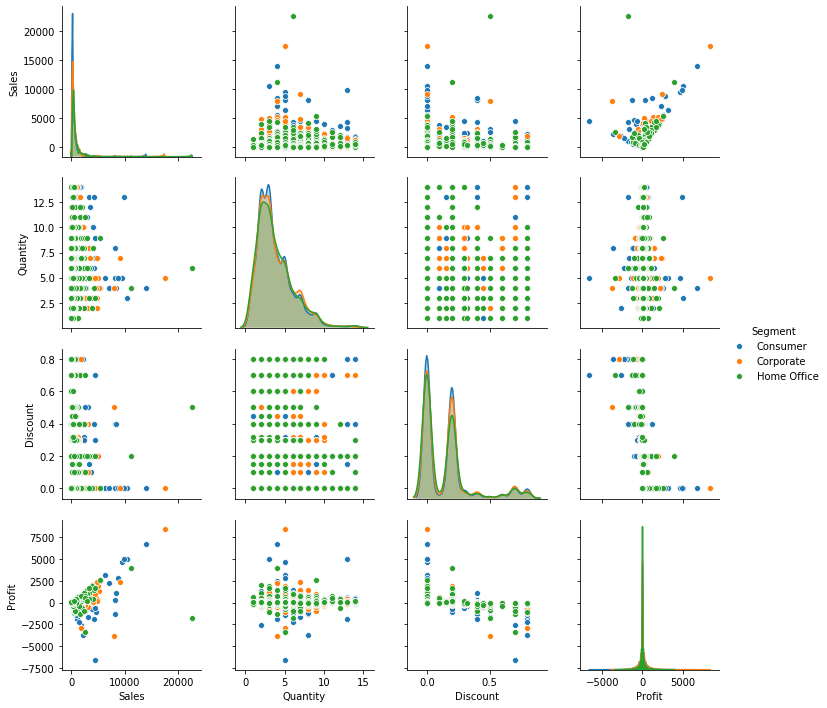

In [13]:
sns.pairplot(data[['Sales', 'Quantity', 'Discount', 'Profit', 'Segment']],hue = 'Segment')

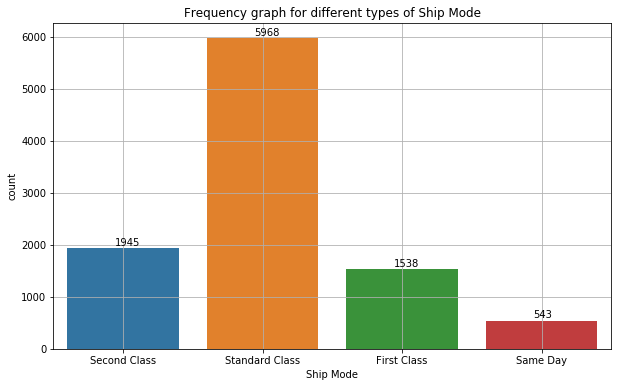

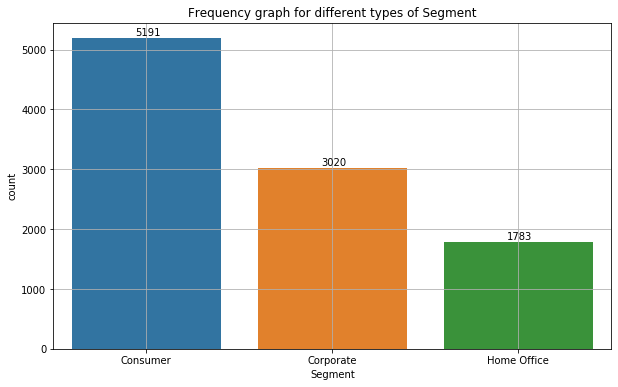

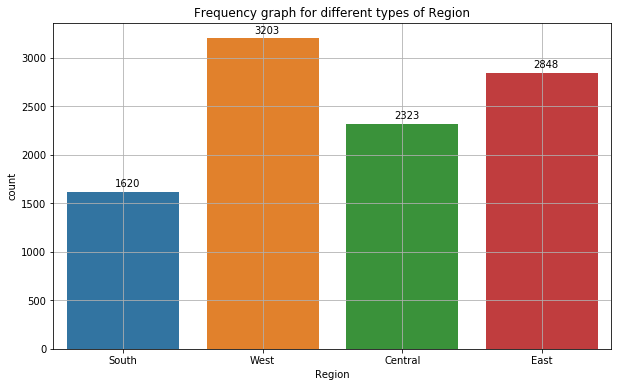

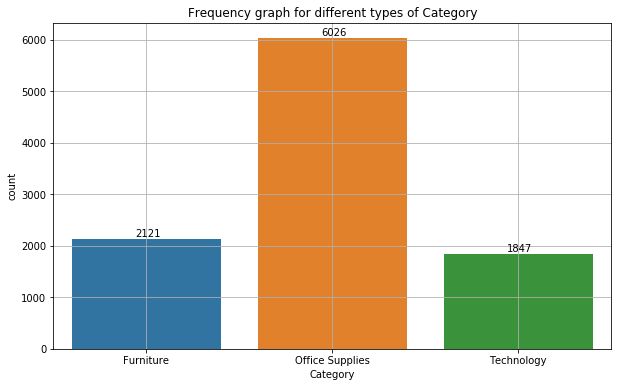

In [14]:
for i in ['Ship Mode','Segment', 'Region', 'Category']:
    plt.figure(figsize=(10,6))
    ax = sns.countplot(data[i])
    for p in ax.patches:
            ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.34, p.get_height()+50))
    plt.title('Frequency graph for different types of {}'.format(i))
    plt.grid()

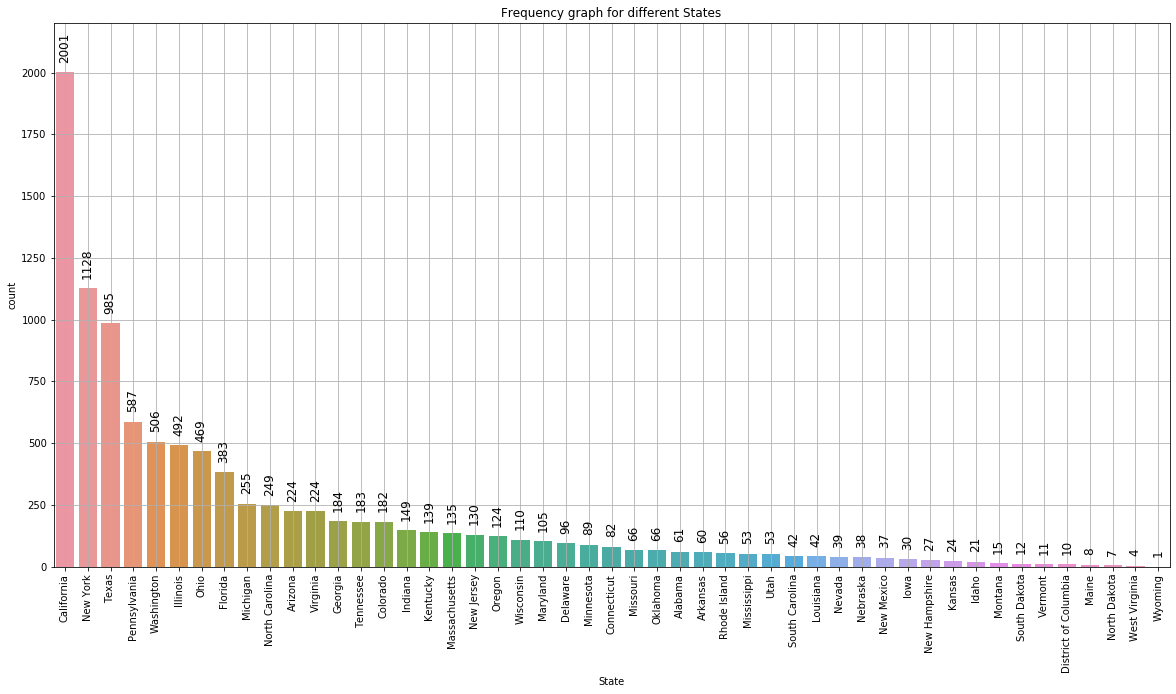

In [15]:
plt.figure(figsize=(20,10))
count = data['State'].value_counts()
ax = sns.countplot(data['State'],order = count.index)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50), rotation=90, size =12)
plt.xticks(rotation=90)
plt.title('Frequency graph for different States')
plt.ylim((0,2200))
plt.grid()


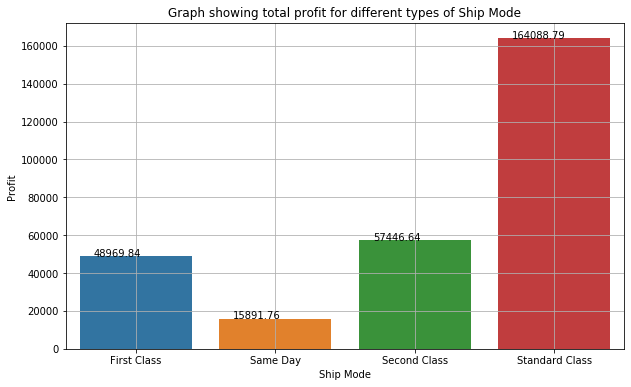

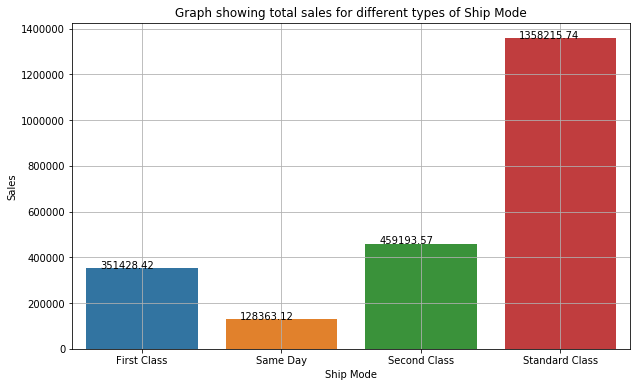

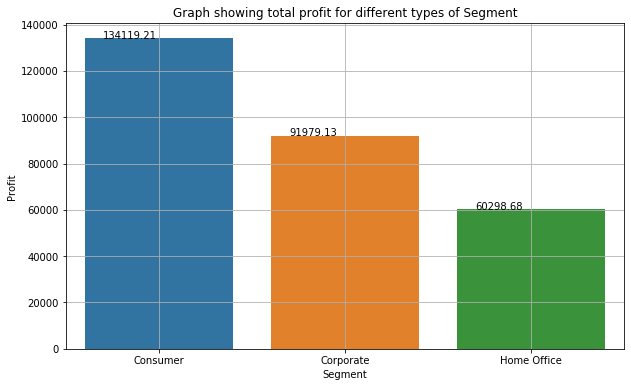

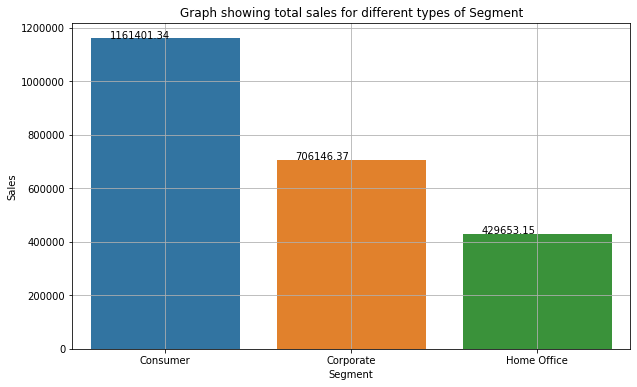

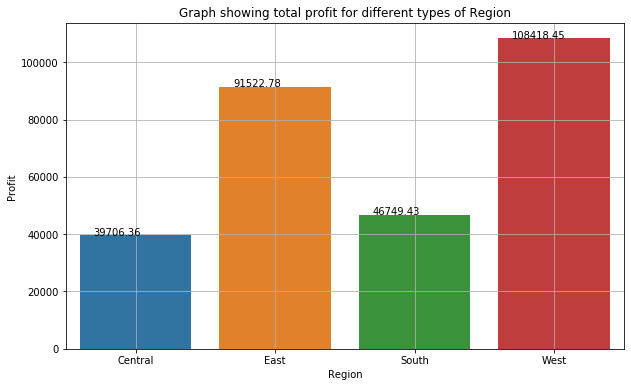

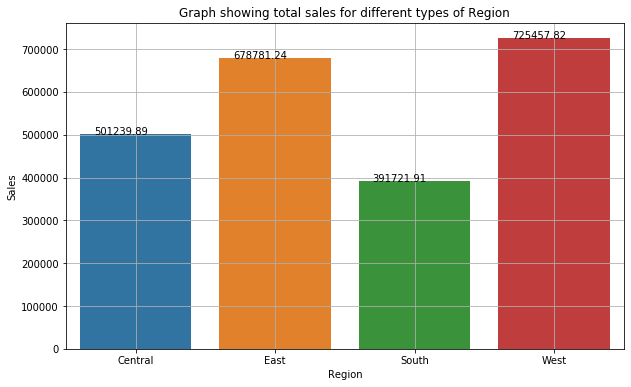

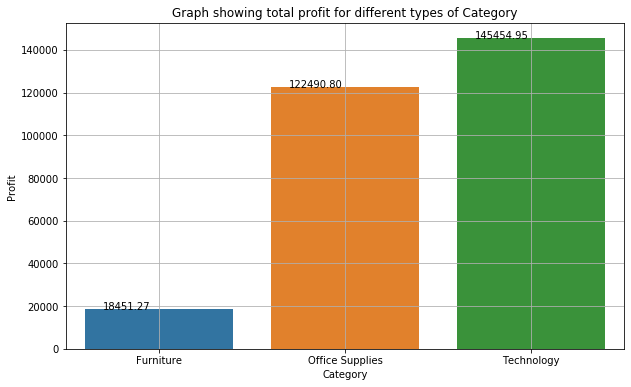

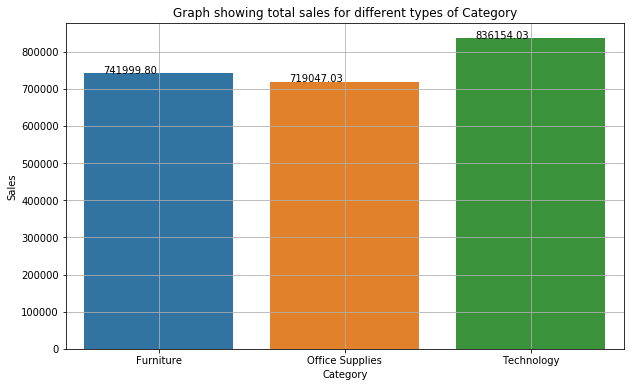

In [17]:
for i in ['Ship Mode','Segment', 'Region', 'Category']:
    res = data.groupby(i)['Profit', 'Sales'].sum()
    for j in list(res.columns):        
        plt.figure(figsize=(10,6))
        ax = sns.barplot(res.index, res[j])
        for p in ax.patches:
                ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
        plt.title('Graph showing total {} for different types of {}'.format(j.lower(),i))
        plt.grid()

Even though no category has reported any loses, Furniture has the lowest profit margin. Whereas Technology has reported highest profit margin and hence I recommend that more investment needs to made in selling technology items.

It can also be seen that the East and West Regions have high sales and high profit margins. Consumer Segment is the most profitable among the three segment.

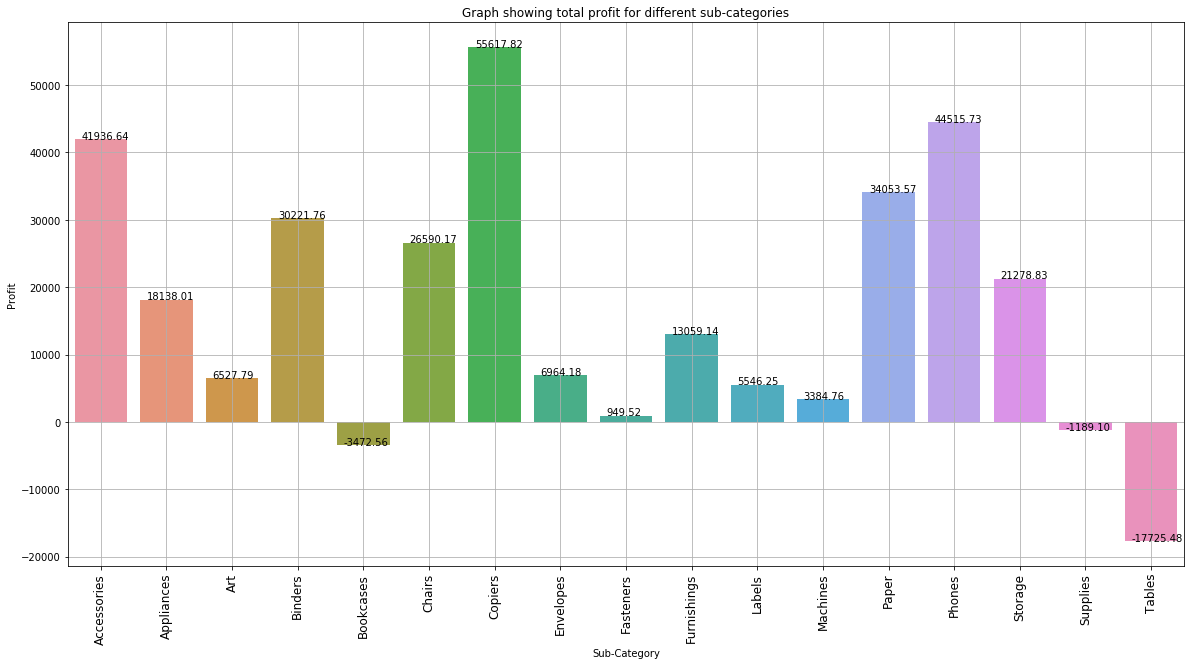

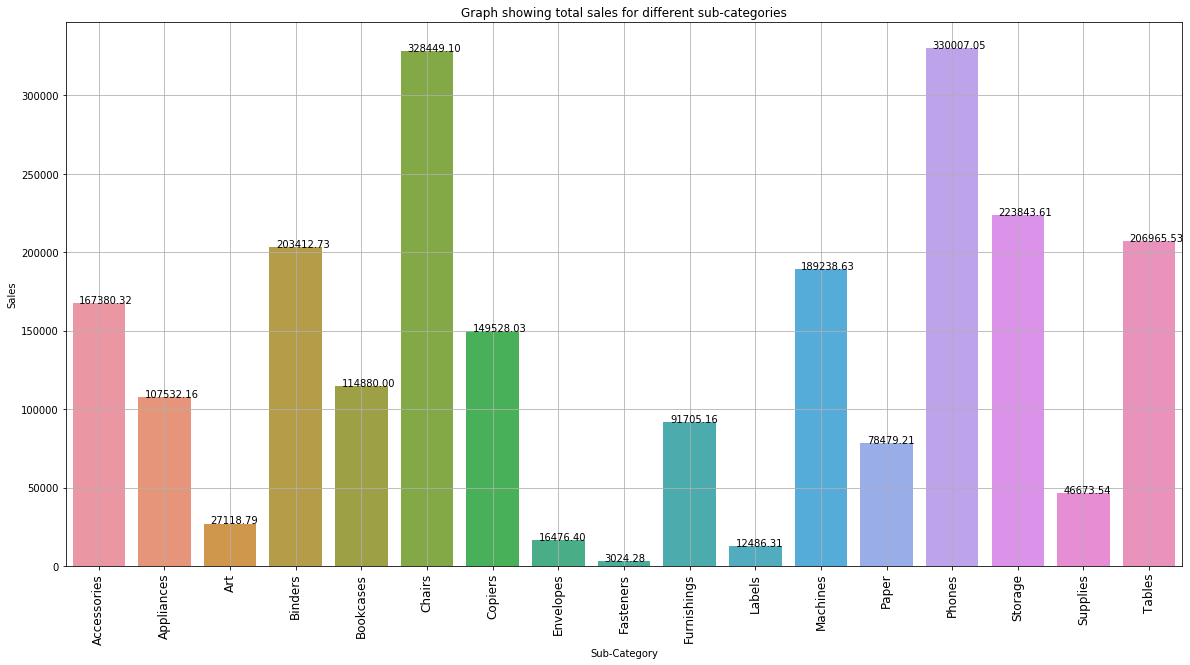

In [18]:
res = data.groupby('Sub-Category')['Profit', 'Sales'].sum()
for j in res.columns:        
    plt.figure(figsize=(20,10))
    ax = sns.barplot(res.index, res[j])
    for p in ax.patches:
        if p.get_height()>=0:
            ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
        else:
            ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))
    plt.title('Graph showing total {} for different sub-categories'.format(j.lower()))
    plt.xticks(size = 12,rotation=90)
    plt.grid()

The items in sub-category Tables, Supplies and Bookcases have reported loses. Whereas Copiers, Accessories, Phones are the top 3 profit making sub0-categories.

Even chairs and machines have high sales, they have lower profit margin.

### Taking a look at sale and profit statewise


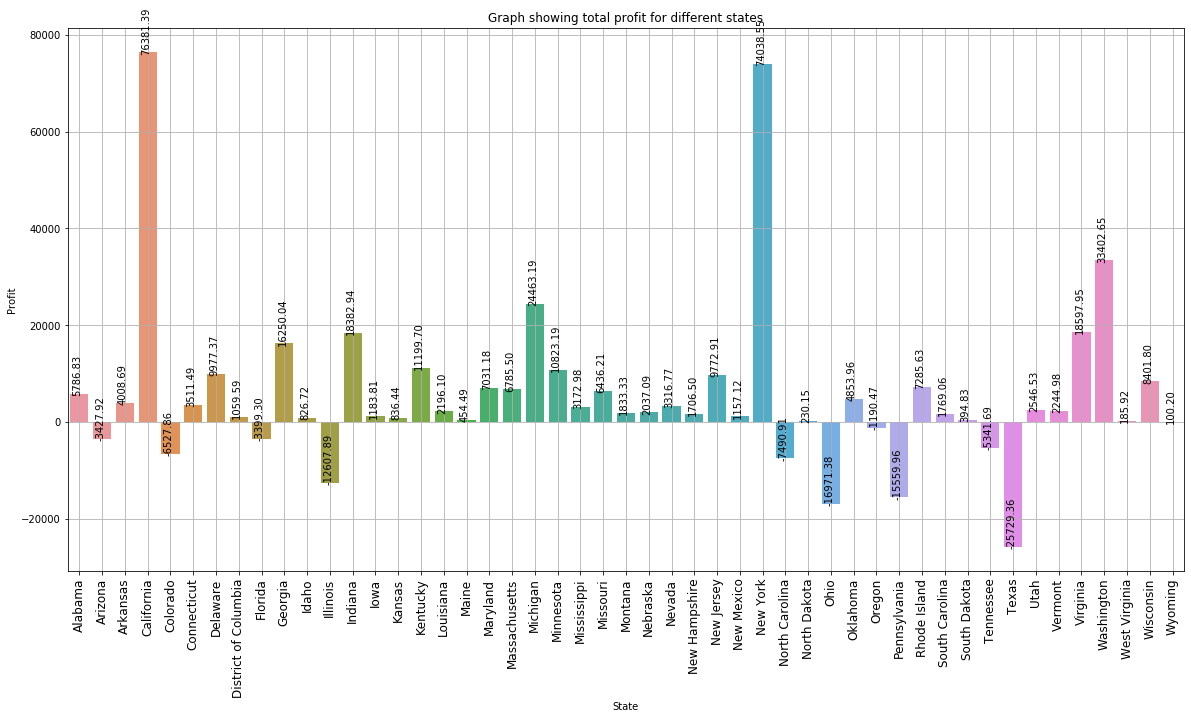

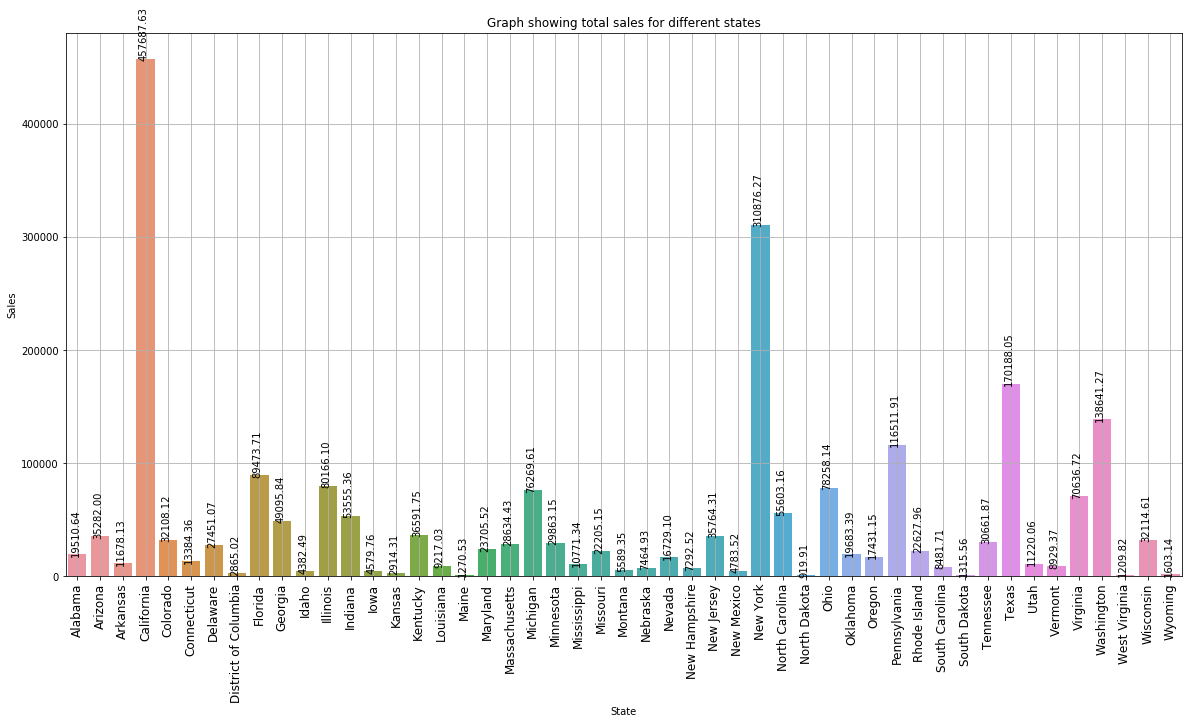

In [19]:
res = data.groupby('State')['Profit', 'Sales'].sum()
for j in res.columns:        
    plt.figure(figsize=(20,10))
    ax = sns.barplot(res.index, res[j])
    for p in ax.patches:
        if p.get_height()>=0:
            ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()),rotation=90)
        else:
            ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()),rotation=90)
    plt.title('Graph showing total {} for different states'.format(j.lower()))
    plt.xticks(size = 12,rotation=90)
    plt.grid()


In [20]:
res = data.groupby('State')['Profit'].sum()
res = res[res<0]
print('The {} states that reported a loss:'.format(len(res.index)),end=' ')
for i in range(len(res.index)):
    if i == len(res.index)-1:
        print(res.index[i],end='.')
        continue
    print(res.index[i],end=', ')

The 10 states that reported a loss: Arizona, Colorado, Florida, Illinois, North Carolina, Ohio, Oregon, Pennsylvania, Tennessee, Texas.

This states have reported a loss and hence are hereby the focus of the task.

### First take a look at states that are reporting profits:

In [22]:
bool_ = data['State'].apply(lambda i: False if i in list(res.index) else True)
states_reporting_profit = data[bool_].reset_index(drop = True)
states_reporting_profit.drop(['Country','Postal Code','Region'],axis = 1, inplace = True)

In [23]:
bool_ = data['State'].apply(lambda i: False if i in list(res.index) else True)
states_reporting_profit = data[bool_].reset_index(drop = True)
states_reporting_profit.drop(['Country','Postal Code','Region'],axis = 1, inplace = True)

### Now looking at states reporting loss

In [24]:
bool_ = data['State'].apply(lambda i: True if i in list(res.index) else False)
states_reporting_loss = data[bool_].reset_index(drop = True)
states_reporting_loss.drop(['Country','Postal Code'],axis = 1, inplace = True)
states_reporting_loss.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
1,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
2,Standard Class,Consumer,Concord,North Carolina,South,Office Supplies,Paper,15.5520,3,0.20,5.4432
3,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
4,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160


In [25]:
states_reporting_loss.Region.unique()


array(['South', 'Central', 'East', 'West'], dtype=object)

Since the states are located in different regions, the reported loss may not be related to their geographies.

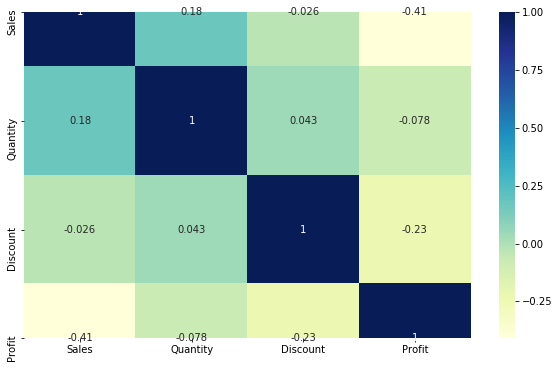

In [27]:
corr = states_reporting_loss.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='YlGnBu')


As can be seen from the heatmaps, profit is negatively correlated to quantity, sales and discount.

As compared to states reporting profit, discount and profit are more strongly correlated. So, the first thing to do is to reduce the discount.

The sales should also be reduced for the moment, atleast till the problem is identified

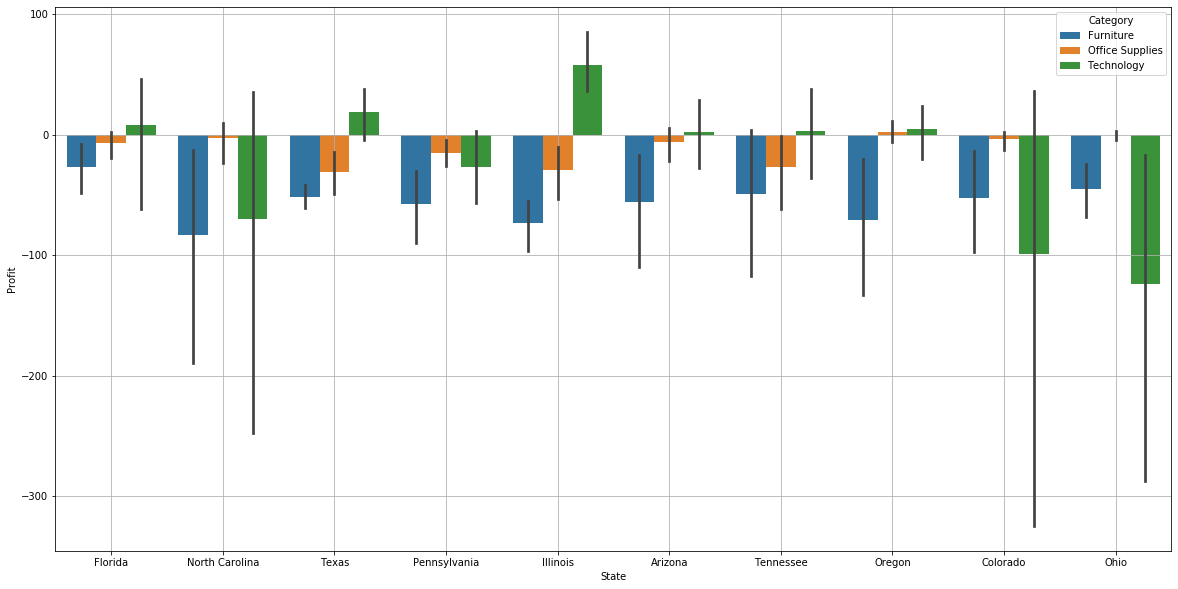

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'State', y = 'Profit', hue = 'Category', data = states_reporting_loss)
plt.grid()

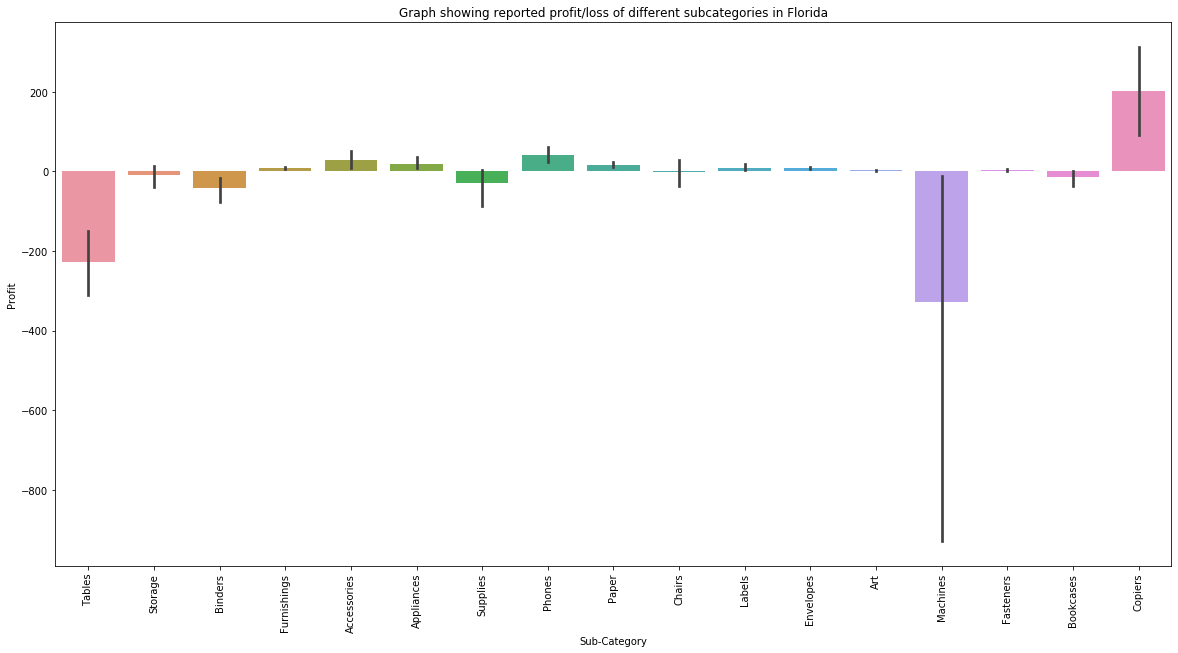

In the state of Florida the following subcategories are reporting a loss: Binders, Bookcases, Chairs, Machines, Storage, Supplies, Tables

 
 



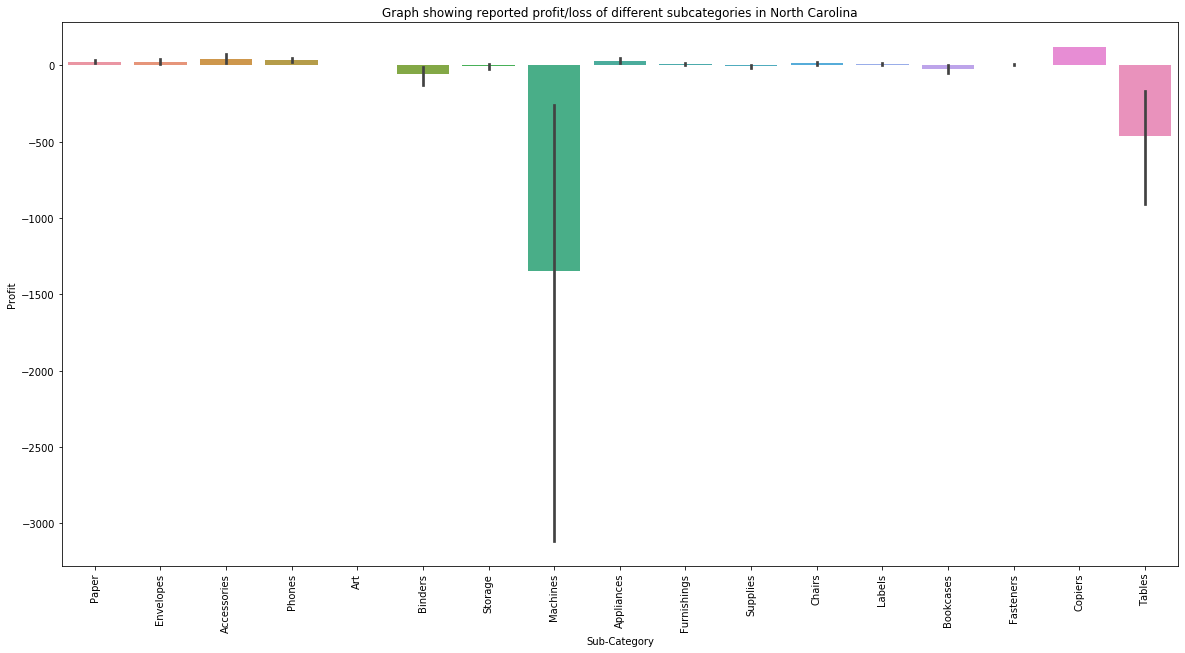

In the state of North Carolina the following subcategories are reporting a loss: Binders, Bookcases, Machines, Storage, Supplies, Tables

 
 



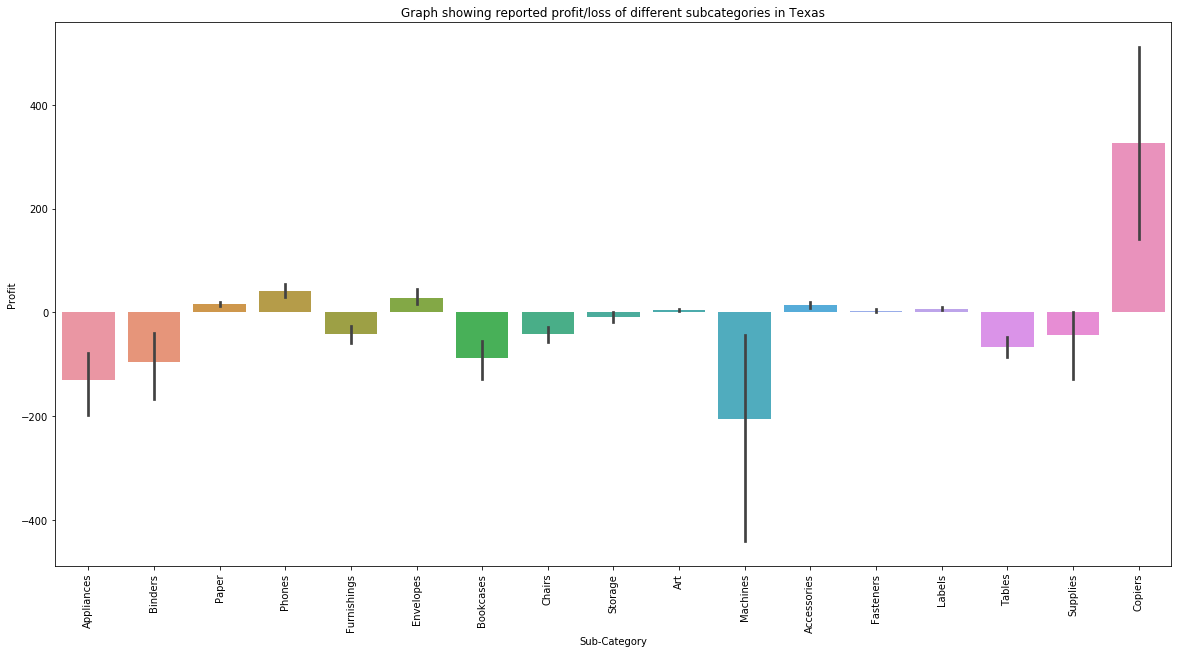

In the state of Texas the following subcategories are reporting a loss: Appliances, Binders, Bookcases, Chairs, Furnishings, Machines, Storage, Supplies, Tables

 
 



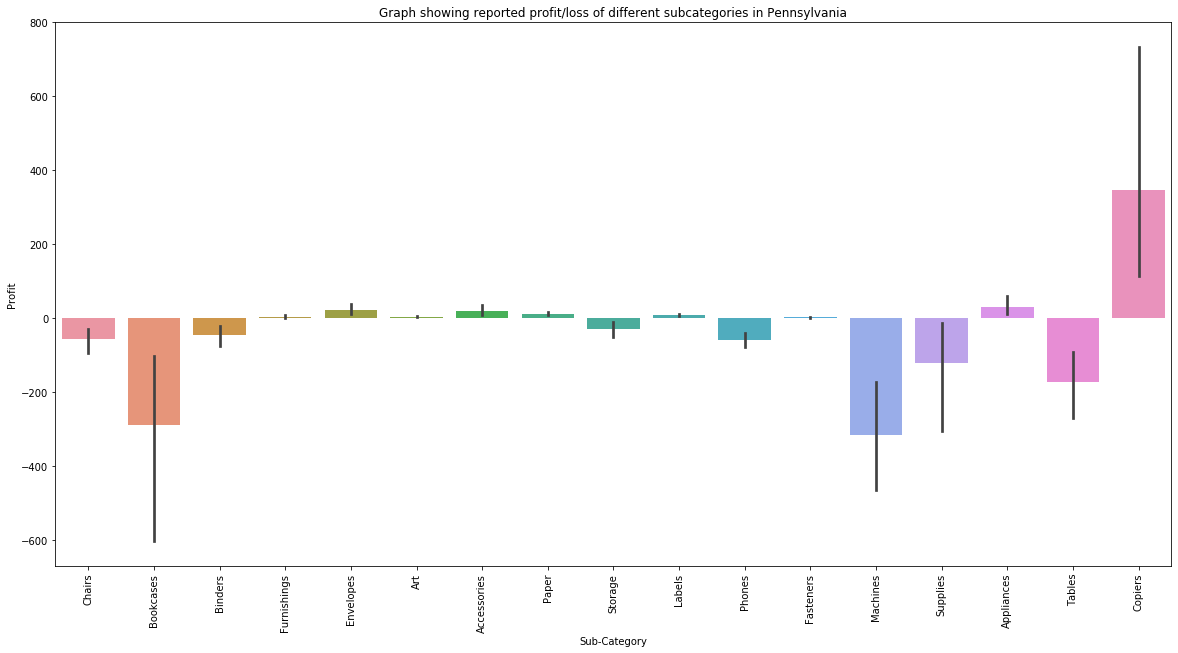

In the state of Pennsylvania the following subcategories are reporting a loss: Binders, Bookcases, Chairs, Machines, Phones, Storage, Supplies, Tables

 
 



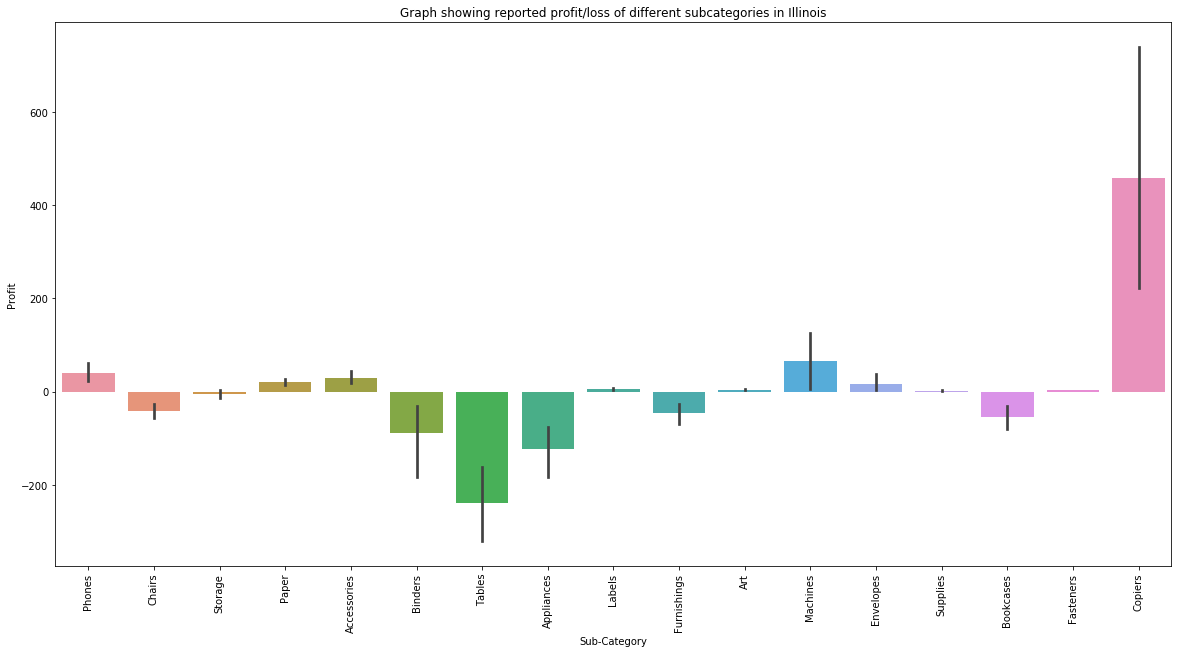

In the state of Illinois the following subcategories are reporting a loss: Appliances, Binders, Bookcases, Chairs, Furnishings, Storage, Tables

 
 



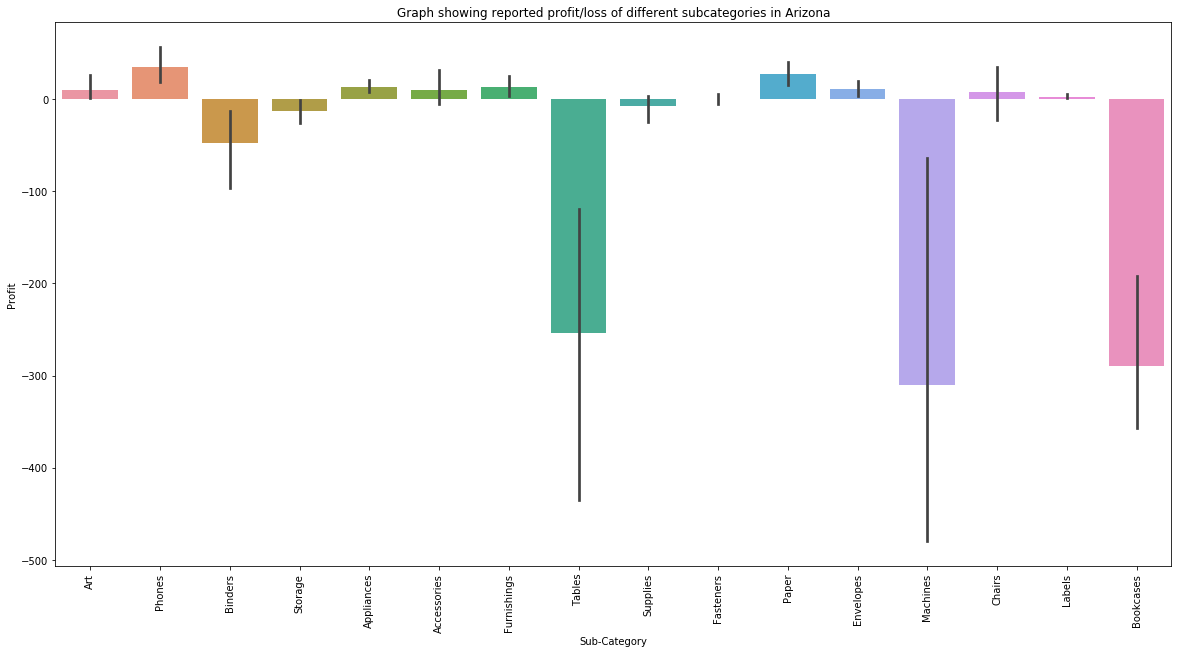

In the state of Arizona the following subcategories are reporting a loss: Binders, Bookcases, Machines, Storage, Supplies, Tables

 
 



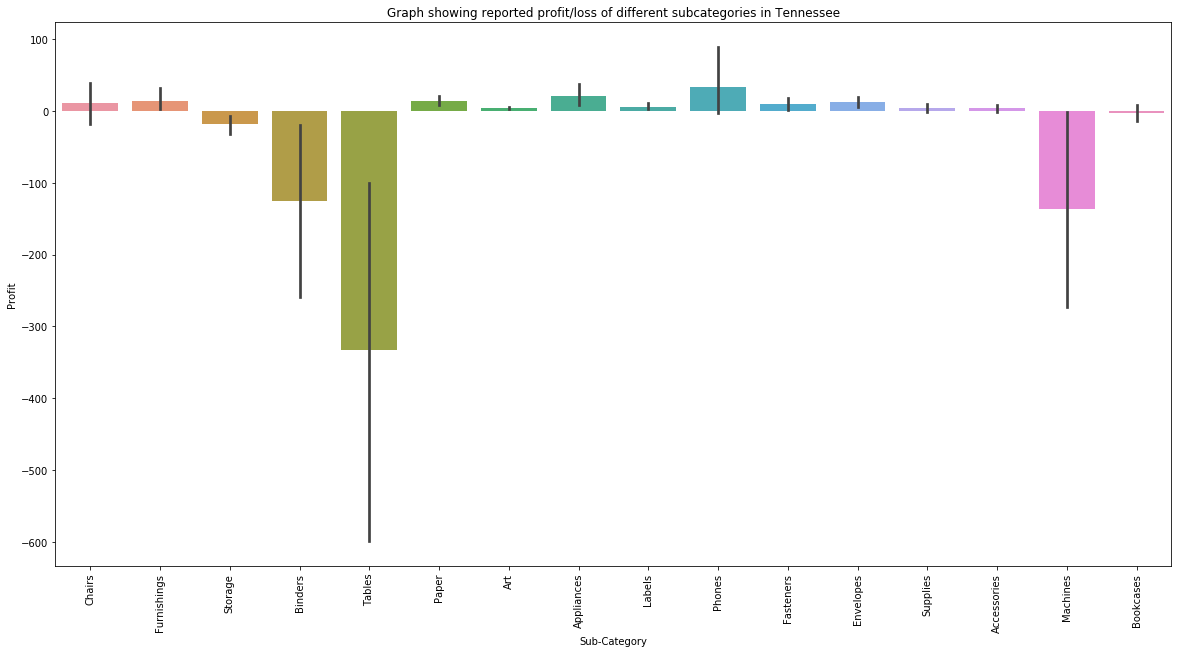

In the state of Tennessee the following subcategories are reporting a loss: Binders, Bookcases, Machines, Storage, Tables

 
 



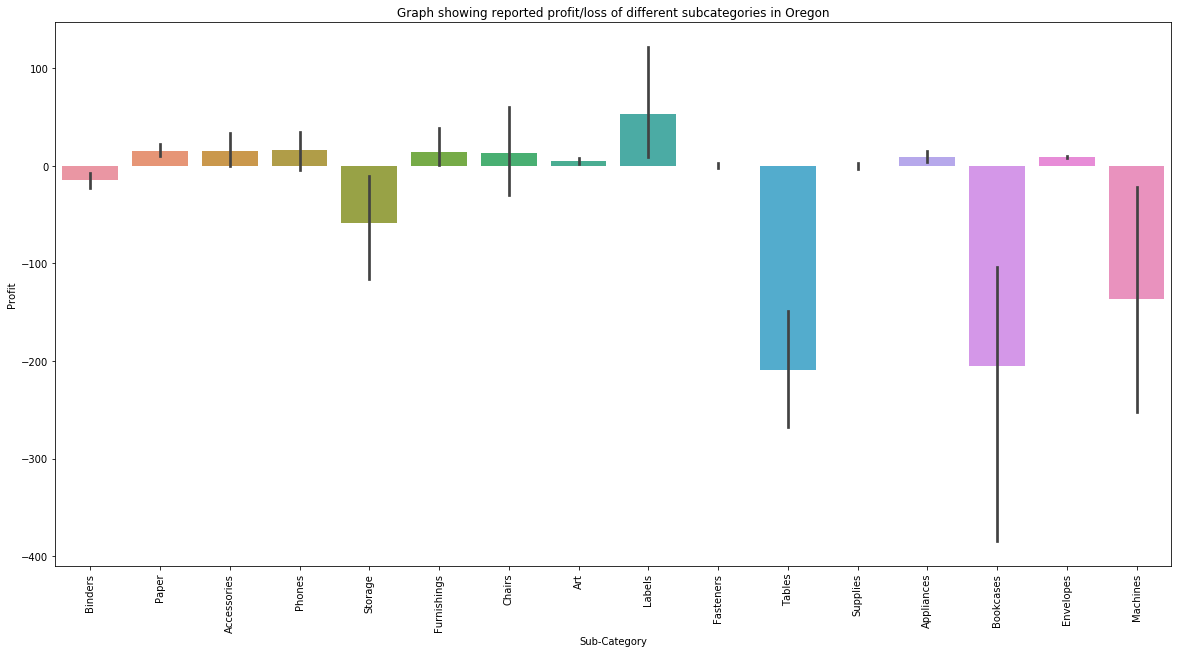

In the state of Oregon the following subcategories are reporting a loss: Binders, Bookcases, Machines, Storage, Supplies, Tables

 
 



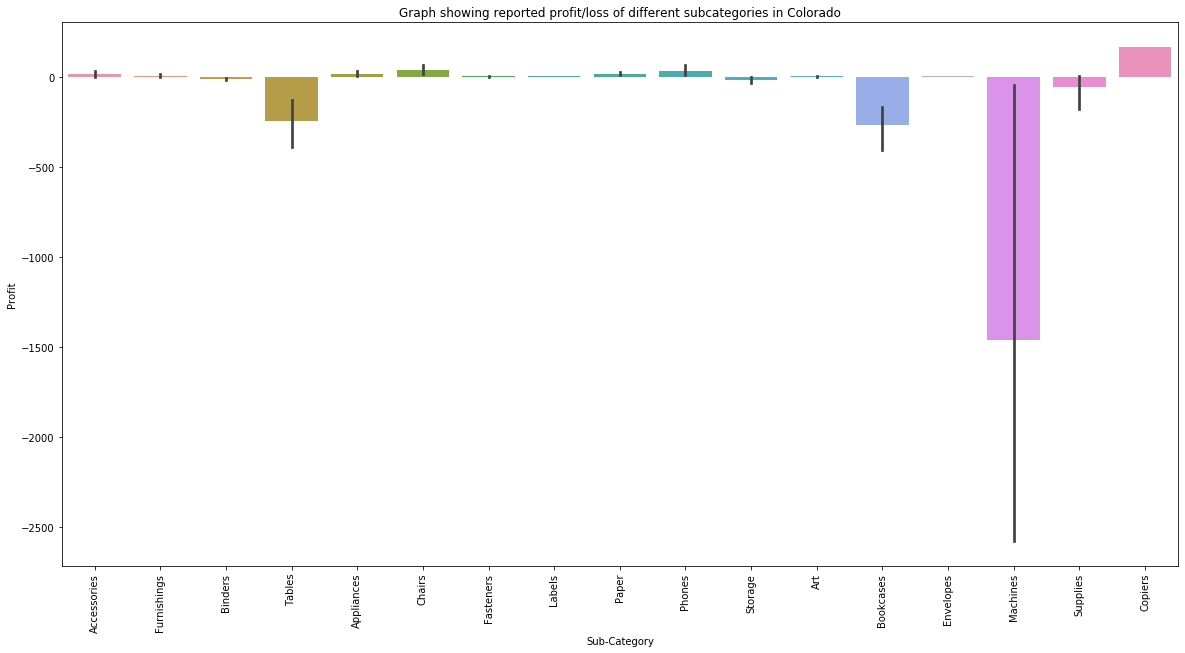

In the state of Colorado the following subcategories are reporting a loss: Binders, Bookcases, Machines, Storage, Supplies, Tables

 
 



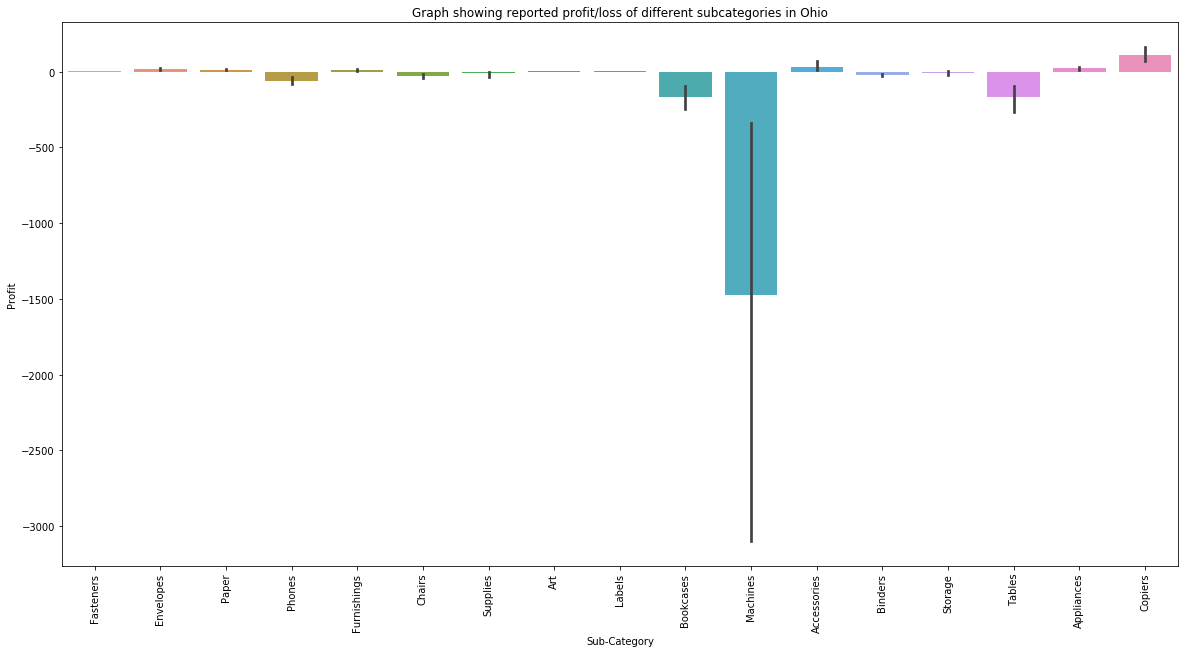

In the state of Ohio the following subcategories are reporting a loss: Binders, Bookcases, Chairs, Machines, Phones, Storage, Supplies, Tables

 
 



In [29]:
for i in states_reporting_loss.State.unique():
    plt.figure(figsize=(20,10))
    data = states_reporting_loss[states_reporting_loss.State==i]
    sns.barplot(x = 'Sub-Category', y = 'Profit', data = data)
    plt.xticks(rotation = 90)
    plt.title('Graph showing reported profit/loss of different subcategories in {}'.format(i))
    plt.show()
    res = data.groupby('Sub-Category')['Profit'].sum()
    res = res[res<0]
    print('In the state of {} the following subcategories are reporting a loss:'.format(i), end = ' ')
    for j in range(len(res.index)):
        if j == len(res.index)-1:
            print(res.index[j])
            
            continue
        print(res.index[j],end=', ')
    print('\n \n \n')

As we can see that, the sale of subcategories that are reporting losses needs to be reduced.